<a href="https://colab.research.google.com/github/igoorsa/MachineLearning/blob/main/TrabalhoFinalModulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Modelos para teste
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier # tem que transformar os dados antes

#PreProcessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Verificando o Melhor parametro
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

In [2]:
pd.set_option('display.max_columns', 23)
dados = pd.read_csv('/content/recipeData.csv', encoding= 'ISO-8859-1')
dados.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [3]:
dados.dtypes

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [4]:
dados.drop('BeerID', axis= 1, inplace = True)
dados.drop('Name', axis= 1, inplace = True)
dados.drop('URL', axis= 1, inplace = True)

In [5]:
dados.head()

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [6]:
dados.isnull().sum()/len(dados['Style']) * 100

Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.839550
PrimingAmount    93.536508
UserId           68.358132
dtype: float64

In [7]:
dados.drop('PrimingMethod', axis = 1, inplace= True)
dados.drop('PrimingAmount', axis = 1, inplace= True)
dados.drop('UserId', axis = 1, inplace= True)
dados.drop('Style', axis = 1, inplace= True)

In [8]:
dados.isnull().sum()/len(dados['StyleID']) * 100

StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
dtype: float64

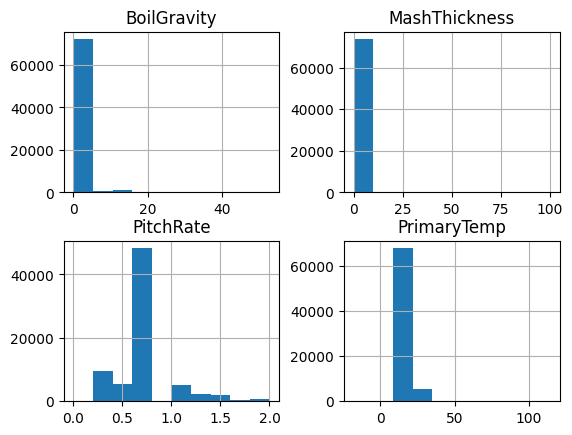

In [113]:
dados.hist(column=['BoilGravity','MashThickness','PitchRate','PrimaryTemp'])
plt.show()

In [9]:
dados['BoilGravity'].value_counts()

1.044     2502
1.042     2470
1.043     2438
1.041     2391
1.040     2304
          ... 
23.900       1
25.300       1
1.237        1
33.300       1
1.266        1
Name: BoilGravity, Length: 509, dtype: int64

In [114]:
dados['BoilGravity'].fillna(dados['BoilGravity'].median(), inplace = True)
dados['BoilGravity'].isnull().sum()

0

In [115]:
dados['MashThickness'].value_counts()

2.127235     29864
1.500000     15499
3.000000      8312
1.250000      4923
2.500000      1864
             ...  
1.133000         1
2.285000         1
27.500000        1
1.579000         1
3.181800         1
Name: MashThickness, Length: 568, dtype: int64

In [116]:
dados['MashThickness'].fillna(dados['MashThickness'].median(), inplace = True)
dados['MashThickness'].isnull().sum()

0

In [117]:
dados['PitchRate'].value_counts()

0.750468    39252
0.350000     9477
0.750000     9002
0.500000     5469
1.000000     5194
1.250000     2405
1.500000     1838
2.000000      640
1.750000      533
0.000000       51
Name: PitchRate, dtype: int64

In [118]:
dados['PitchRate'].fillna(dados['PitchRate'].mean(), inplace = True)
dados['PitchRate'].isnull().sum()

0

In [119]:
dados['PrimaryTemp'].value_counts()

 19.175641    22662
 20.000000    14185
 21.110000     4622
 18.330000     4182
 18.000000     4129
              ...  
 20.780000        1
 2.000000         1
 29.500000        1
-10.560000        1
 23.300000        1
Name: PrimaryTemp, Length: 218, dtype: int64

In [120]:
dados['PrimaryTemp'].fillna(dados['PrimaryTemp'].median(), inplace = True)
dados['PrimaryTemp'].isnull().sum()

0

In [121]:
dados.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale         int64
PitchRate        float64
PrimaryTemp      float64
dtype: object

In [18]:
dados['SugarScale'].value_counts()

Specific Gravity    71959
Plato                1902
Name: SugarScale, dtype: int64

In [19]:
dados['SugarScale']= dados['SugarScale'].replace('Specific Gravity', 0)
dados['SugarScale']= dados['SugarScale'].replace('Plato', 1)

In [20]:
dados['BrewMethod'].value_counts()

All Grain       49692
BIAB            12016
extract          8626
Partial Mash     3527
Name: BrewMethod, dtype: int64

In [21]:
brew = pd.get_dummies(dados['BrewMethod'])
brew.shape, dados.shape

((73861, 4), (73861, 16))

In [22]:
dados.drop('BrewMethod', axis = 1, inplace = True)

In [122]:
dadosConcatenados = pd.concat([dados, brew], axis=1)

In [24]:
dadosConcatenados.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale         int64
PitchRate        float64
PrimaryTemp      float64
All Grain          uint8
BIAB               uint8
Partial Mash       uint8
extract            uint8
dtype: object

In [25]:
dadosConcatenados.isnull().sum()

StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
PitchRate        0
PrimaryTemp      0
All Grain        0
BIAB             0
Partial Mash     0
extract          0
dtype: int64

<Axes: >

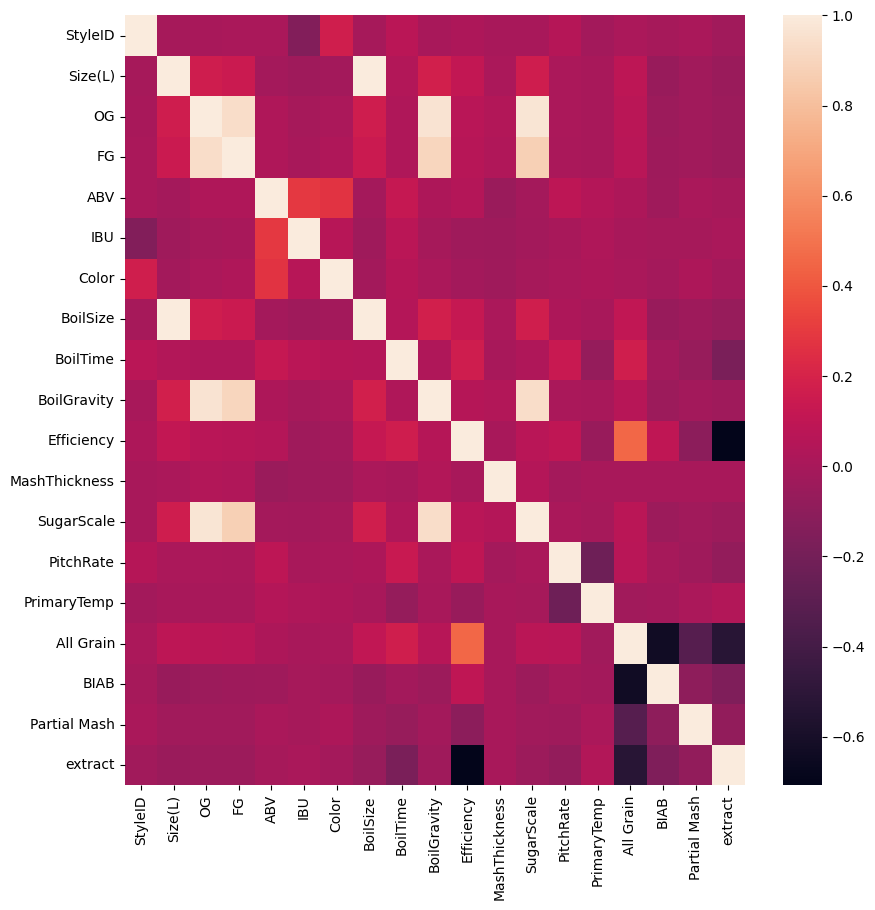

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(dadosConcatenados.corr())

In [27]:
dados.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp
StyleID,1.000000,-0.006522,0.002699,0.007336,0.006617,-0.141124,0.166669,-0.006301,0.077969,0.002278,0.021515,0.004754,0.003359,0.054350,-0.016434
Size(L),-0.006522,1.000000,0.162237,0.141614,-0.013527,-0.029917,-0.018068,0.994143,0.044848,0.175921,0.108826,0.018220,0.165177,0.016699,0.003178
OG,0.002699,0.162237,1.000000,0.936347,0.029432,-0.001655,0.013632,0.165162,0.031825,0.962264,0.067610,0.042440,0.966978,0.013844,0.000424
FG,0.007336,0.141614,0.936347,1.000000,0.026851,-0.000719,0.029848,0.142974,0.028930,0.903288,0.061173,0.036757,0.879895,0.008677,0.003551
ABV,0.006617,-0.013527,0.029432,0.026851,1.000000,0.290889,0.271332,-0.009800,0.120629,0.024827,0.047853,-0.051918,-0.011754,0.089161,0.047781
IBU,-0.141124,-0.029917,-0.001655,-0.000719,0.290889,1.000000,0.060283,-0.028258,0.078694,-0.007304,-0.033172,-0.035046,-0.014984,0.004372,0.029349
Color,0.166669,-0.018068,0.013632,0.029848,0.271332,0.060283,1.000000,-0.016798,0.058089,0.013122,-0.017297,-0.029688,-0.005038,0.010953,0.020996
BoilSize,-0.006301,0.994143,0.165162,0.142974,-0.009800,-0.028258,-0.016798,1.000000,0.051219,0.175798,0.121971,0.016756,0.167185,0.019651,0.002246
BoilTime,0.077969,0.044848,0.031825,0.028930,0.120629,0.078694,0.058089,0.051219,1.000000,0.026393,0.161295,0.005332,0.027187,0.138103,-0.067988
BoilGravity,0.002278,0.175921,0.962264,0.903288,0.024827,-0.007304,0.013122,0.175798,0.026393,1.000000,0.058193,0.045140,0.936439,0.010609,0.001854


In [28]:
dadosConcatenados.drop('FG', axis = 1, inplace = True)
dadosConcatenados.drop('BoilSize', axis = 1, inplace = True)
dadosConcatenados.drop('BoilGravity', axis = 1, inplace = True)
dadosConcatenados.drop('SugarScale', axis = 1, inplace = True)

<Axes: >

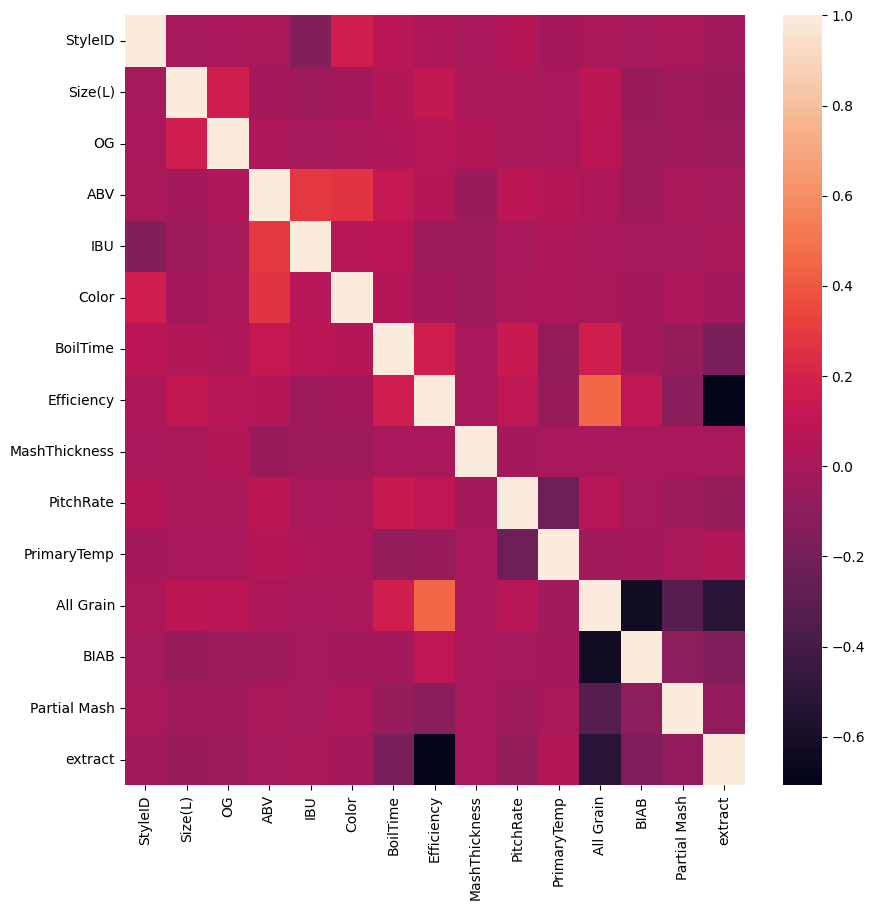

In [29]:
plt.figure(figsize= (10,10))
sns.heatmap(dadosConcatenados.corr())

In [31]:
dadosConcatenados.shape

(73861, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x78fb18d91c30>,
 'caps': [<matplotlib.lines.Line2D at 0x78fb18d92170>,
 'boxes': [<matplotlib.lines.Line2D at 0x78fb18d91990>,
 'medians': [<matplotlib.lines.Line2D at 0x78fb18d926b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x78fb18d92950>,
 'means': []}

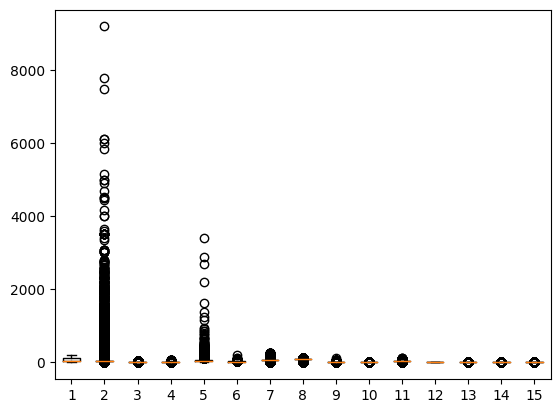

In [32]:
plt.boxplot(dadosConcatenados)

In [33]:
dadosConcatenados.shape

(73861, 15)

In [34]:
for i, valor in enumerate(dadosConcatenados['Size(L)']):
  if(valor>6000):
    print(i)
    print(valor)
    dadosConcatenados.drop(dadosConcatenados['StyleID'][i], axis= 0, inplace= True)

11014
7476.19
32113
7800.0
51091
9200.0
58088
6102.08
59014
6102.08


In [35]:
for i, valor in enumerate(dadosConcatenados['IBU']):
  if(valor>2000):
    print(i)
    print(valor)
    dadosConcatenados.drop(dadosConcatenados['StyleID'][i], axis= 0, inplace= True)

3372
2197.07
5209
2673.83
48521
3409.3
72527
2881.42


In [36]:
for i in range(dadosConcatenados['StyleID'].min(),(dadosConcatenados['StyleID'].max()+1)):
  if(dadosConcatenados['StyleID'].value_counts()[i]<=1000):
    dadosConcatenados['StyleID'].replace(i, None, inplace= True)

In [37]:
dadosConcatenados['StyleID'].isnull().sum()

38433

In [47]:
dadosConcatenados.dropna( axis = 0, inplace= True)

In [51]:
x = dadosConcatenados.drop('StyleID', axis=1)
y = dadosConcatenados['StyleID']
y.shape, x.shape

((35419,), (35419, 14))

In [61]:
def MelhorModelo(x,y):
  def TestandoModelos(modelo, x,y):
    SKFold = StratifiedKFold()
    val = cross_val_score(modelo,x,y, cv=SKFold)
    return val.mean()

  MGaussean = GaussianNB()
  Tree = DecisionTreeClassifier()
  Dummy = DummyClassifier()

  Gaussean_result = TestandoModelos(MGaussean,x,y)
  Tree_result = TestandoModelos(Tree,x,y)
  Dummy_result = TestandoModelos(Dummy,x,y)

  #transformando padroes para rodar O KNN
  norm = MinMaxScaler((0,1))
  x_norm= norm.fit_transform(x)
  KN = KNeighborsClassifier()

  KN_result= TestandoModelos(KN,x_norm, y)

  valores = {'Gaussean': Gaussean_result,
             'Arvore de Decissao': Tree_result, 'KNN': KN_result,
             'Dummy': Dummy_result}
  return valores

In [62]:
MelhorModelo(x,y)

{'Gaussean': 0.4566474805909091,
 'Arvore de Decissao': 0.4791211857340801,
 'KNN': 0.4866878313787324,
 'Dummy': 0.337022501527225}

In [75]:
features = SelectKBest(k = 13)
features.fit(x,y).scores_

array([8.64131842e+00, 2.32446910e+00, 8.78156002e+02, 1.09789423e+03,
       4.40303962e+03, 9.63896134e+01, 1.13454502e+01, 1.19023118e+01,
       5.19735353e+01, 1.21030537e+02, 3.27525579e+00, 8.47620048e+00,
       2.36060721e+00, 1.00470612e+01])

In [77]:
norm = MinMaxScaler((0,1))
x_norm= norm.fit_transform(x)

In [101]:
n_neighbors = [3,5,7]
p = [2,3,4,5,6]
metric = ['cityblock', 'cosine', 'euclidean', 'haversine','l1','l2','manhattan','nan_euclidean']
n_neighbors = [7,9,11,13]
n_neighbors = [19,21,23]
valores = {'n_neighbors':n_neighbors}

In [103]:
weights = ['uniform','distance','callable', None]
algorithm = ['auto','ball_tree','kd_tree','brute']
valores = {'weights':weights,'algorithm':algorithm}

In [104]:
Modelo = KNeighborsClassifier(n_neighbors=21, p = 2, metric= 'cityblock',
                              weights= 'distance', algorithm='auto', n_jobs=-1)
MelhoresParametros = GridSearchCV(Modelo,valores,cv=5)
MelhoresParametros.fit(x_norm,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skle

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='cityblock', n_jobs=-1,
                                            n_neighbors=21),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance', 'callable', None]})

In [105]:
print(MelhoresParametros.best_score_)
print(MelhoresParametros.best_estimator_.weights)
print(MelhoresParametros.best_estimator_.algorithm)

0.5396536095005794
distance
auto


In [123]:
Modelo = KNeighborsClassifier(n_neighbors=21, p = 2, metric= 'cityblock',
                              weights= 'distance', algorithm='auto', n_jobs=-1)
x_teste,x_treino,y_teste,y_treino = train_test_split(x_norm, y, test_size= 0.3,
                                                    random_state=1)
Modelo.fit(x_treino,y_treino)

KNeighborsClassifier(metric='cityblock', n_jobs=-1, n_neighbors=21,
                     weights='distance')

In [124]:
Modelo.score(x_teste,y_teste)

0.5120396886217884